In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import missingno

In [2]:
# Setup
sns.set(
    style="dark",
    context="notebook",
    palette="colorblind"
)

## Carregamento e tratamento dos dados

In [3]:
# Lendo o arquivo xlsx
df_house = pd.read_excel("house.xlsx")
df_house.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,192,84,0,0,0,0,0,12,2008,250000


In [4]:
# Analisando informasoes do dataset
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  BsmtFinSF1     1460 non-null   int64  
 12  BsmtFinSF2     1460 non-null   int64  
 13  BsmtUnfSF      1460 non-null   int64  
 14  TotalBsmtSF    1460 non-null   int64  
 15  1stFlrSF       1460 non-null   int64  
 16  2ndFlrSF       1460 non-null   int64  
 17  LowQualFinSF   1460 non-null   int64  
 18  GrLivAre

### Tratando as variáveis categóricas

In [5]:
# Verificando as variáveis do tipo object
cat_cols = df_house.select_dtypes(exclude="number").columns
display(df_house[cat_cols].head())
print(df_house["ExterQual"].unique())
print(df_house["ExterCond"].unique())

,ExterQual,ExterCond
0,Gd,TA
1,TA,TA
2,Gd,TA
3,TA,TA
4,Gd,TA


['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Po' 'Ex']


In [6]:
# Substituindo as fetures ExterQual e ExterCond por valores numéricos
label_order = {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po": 0}
df_house[cat_cols] = df_house[cat_cols].replace(label_order)
display(df_house[cat_cols].head())
df_house.dtypes

,ExterQual,ExterCond
0,3,2
1,2,2
2,3,2
3,2,2
4,3,2


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64


### Tratando valores faltantes

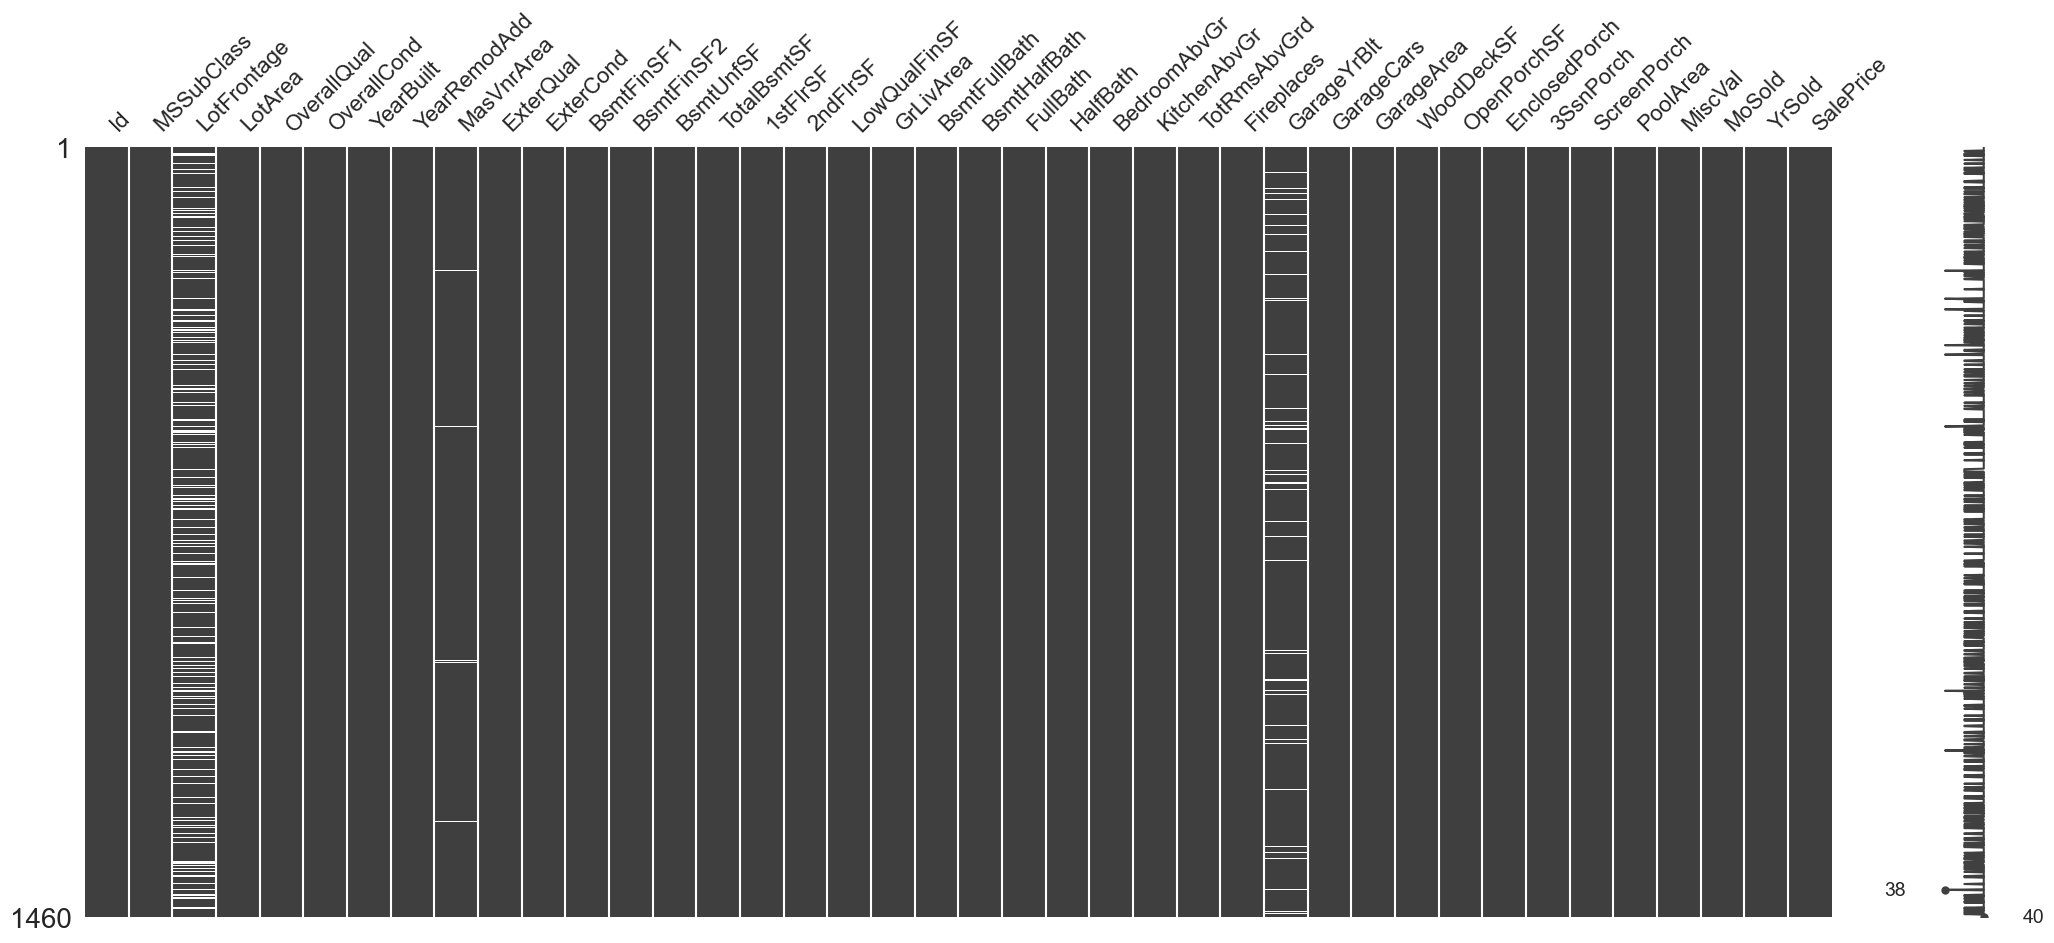

In [7]:
# Verificando matriz de dados faltantes
missingno.matrix(df_house);

In [8]:
# Contando valores faltantes nas features
df_house.isna().sum()[df_house.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [9]:
# Adotando a estratégia de substituir dados faltantes em LotFrontAge pela mediana
df_house["LotFrontage"] = df_house["LotFrontage"].fillna(df_house["LotFrontage"].median())

# Adotando a estratégia de substituir dados faltantes em MasVnrArea por 0
df_house["MasVnrArea"] = df_house["MasVnrArea"].fillna(0)

# Adotando a estratégia de substituir dados faltantes em GarageYrBlt por 0
df_house["GarageYrBlt"] = df_house["GarageYrBlt"].fillna(0)

## Modelagem e avaliação do modelo

In [10]:
# Separando as variáveis entre regressoras e target
X = df_house.drop(labels=["Id", "SalePrice"], axis=1)
y = df_house["SalePrice"]

# Separando a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

### Random Forest Regressor

In [11]:
# Declarando o modelo RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Treinando o modelo
rf.fit(X_train, y_train)

# Previsão com o modelo
y_pred_rf = rf.predict(X_test)

In [12]:
# Avaliando o modelo pelas métricas R², MAE, MSE e RMSE
print(f"R² = {rf.score(X_test, y_test)}")
print(f"MAE = {mean_absolute_error(y_pred_rf, y_test)}")
print(f"MSE = {mean_squared_error(y_pred_rf, y_test)}")
print(f"RMSE = {mean_squared_error(y_pred_rf, y_test) ** (1/2)}")

R² = 0.8615794720784817
MAE = 17791.27243287671
MSE = 1094727358.2107077
RMSE = 33086.66435606206


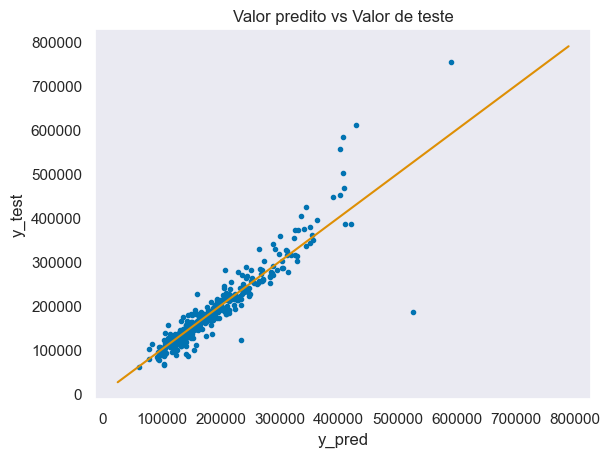

In [13]:
# Analisando a regressão graficamente
plt.plot(y_pred_rf, y_test, ".")
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Valor predito vs Valor de teste");

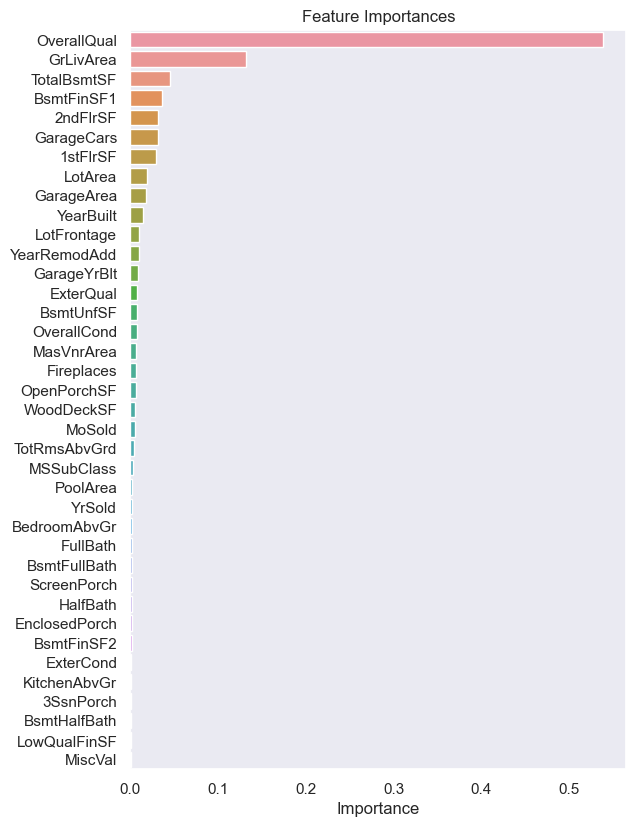

In [14]:
rf_imp = pd.Series(
    data=rf.feature_importances_,
    index=rf.feature_names_in_
    ).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6.4, 4.8*2))
sns.barplot(x=rf_imp.values, y=rf_imp.index)
ax.set_title("Feature Importances")
ax.set_xlabel("Importance")
plt.show()

### AdaBoost Regressor

In [15]:
# Declarando o modelo AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators=1000, random_state=42)

# Treinando o modelo
ab.fit(X_train, y_train)

# Previsão com o modelo
y_pred_ab = ab.predict(X_test)

In [16]:
# Avaliando o modelo pelas métricas R², MAE, MSE e RMSE
print(f"R² = {ab.score(X_test, y_test)}")
print(f"MAE = {mean_absolute_error(y_pred_ab, y_test)}")
print(f"MSE = {mean_squared_error(y_pred_ab, y_test)}")
print(f"RMSE = {mean_squared_error(y_pred_ab, y_test) ** (1/2)}")

R² = 0.8318438151568659
MAE = 23047.298398845393
MSE = 1329897947.6836588
RMSE = 36467.76587184439


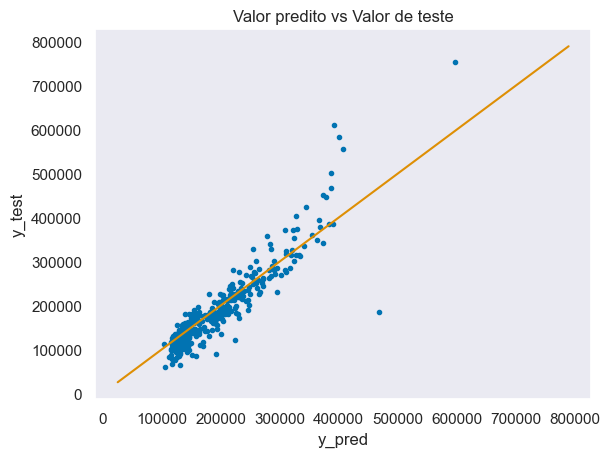

In [17]:
# Analisando a regressão graficamente
plt.plot(y_pred_ab, y_test, ".")
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Valor predito vs Valor de teste");

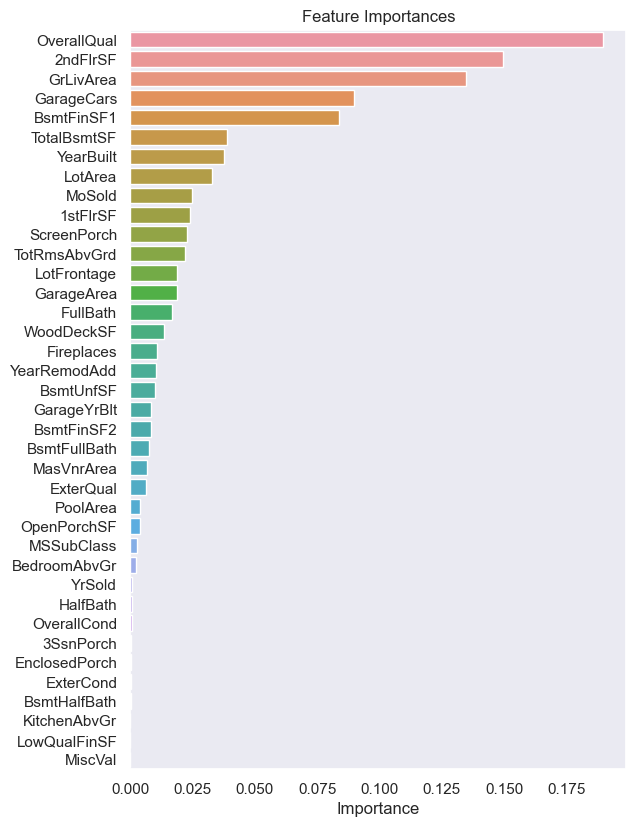

In [18]:
# Análise gráfica das importâncias
ab_imp = pd.Series(
    data=ab.feature_importances_,
    index=ab.feature_names_in_
    ).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6.4, 4.8*2))
sns.barplot(x=ab_imp.values, y=ab_imp.index)
ax.set_title("Feature Importances")
ax.set_xlabel("Importance")
plt.show()

 ### Gradient Boosting Regressor

In [19]:
# Declarando o modelo GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=1000, random_state=42)

# Treinando o modelo
gb.fit(X_train, y_train)

# Previsão com o modelo
y_pred_gb = gb.predict(X_test)

In [20]:
# Avaliando o modelo pelas métricas R², MAE, MSE e RMSE
print(f"R² = {gb.score(X_test, y_test)}")
print(f"MAE = {mean_absolute_error(y_pred_gb, y_test)}")
print(f"MSE = {mean_squared_error(y_pred_gb, y_test)}")
print(f"RMSE = {mean_squared_error(y_pred_gb, y_test) ** (1/2)}")

R² = 0.876708008645354
MAE = 16627.926712055545
MSE = 975080199.526005
RMSE = 31226.27418578792


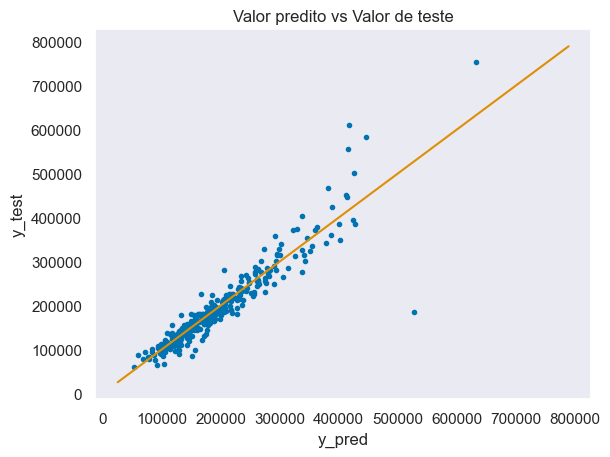

In [21]:
# Analisando a regressão graficamente
plt.plot(y_pred_gb, y_test, ".")
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Valor predito vs Valor de teste");

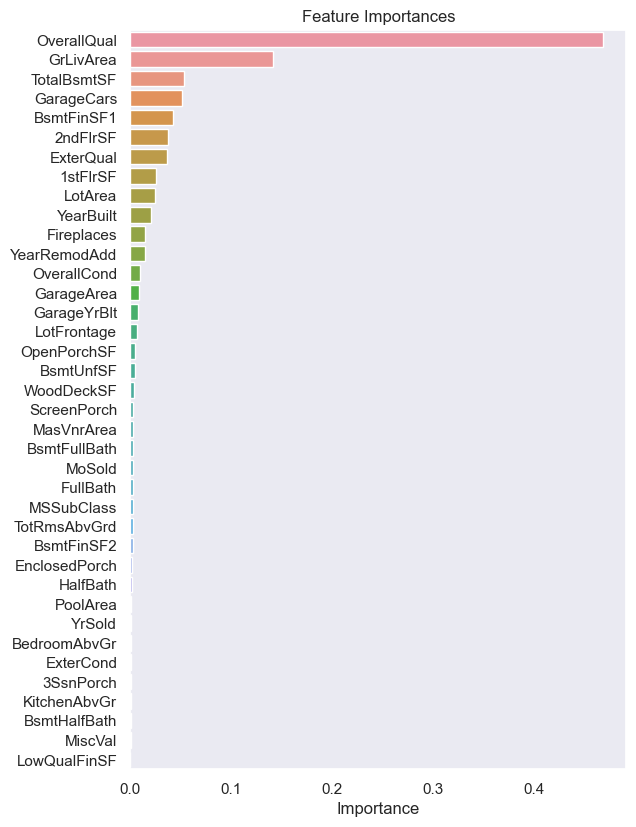

In [22]:
# Análise gráfica das importâncias
gb_imp = pd.Series(
    data=gb.feature_importances_,
    index=gb.feature_names_in_
    ).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6.4, 4.8*2))
sns.barplot(x=gb_imp.values, y=gb_imp.index)
ax.set_title("Feature Importances")
ax.set_xlabel("Importance")
plt.show()